# This notebook is primarily a testing ground used while developing new functionality. Some examples of how to use the functions can be found here, but the notebook is not intended as guide/documentation

In [1]:
import numpy as np 
import pandas as pd

import ExcessMortalityFunctions as emf
from importlib import reload
reload(emf)

from scipy.stats import poisson

import matplotlib.pyplot as plt


# import sys
 
# # setting path
# sys.path.append('../Functions')
# import PandemiXSignaturesForSubfolders as ps

# Generate dataset for testing with large numbers

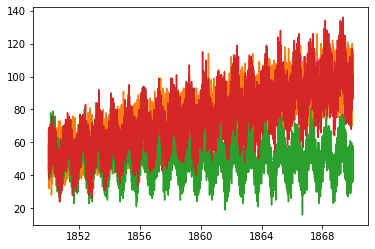

In [2]:
# Generate some data for testing
d1 = np.datetime64('1850-01-01')
d2 = np.datetime64('1870-01-01')
ts = np.arange(d1,d2)

# Constant
curMean = 50 
curBase = poisson.rvs(curMean,size = len(ts))
curBase = curMean * np.ones(len(ts))

# Linearly increasing
curMean2 = 100
allMeans = np.linspace(curMean,curMean2,len(ts))
curBase2 = poisson.rvs(allMeans,size = len(ts))

# Sinusoidal
tDays = (ts -ts[0])/np.timedelta64(1,'D')
sinAmp = 10
sinPer = 2*np.pi/365.25
curBase3 = np.round(poisson.rvs(curMean,size = len(ts)) + sinAmp * np.sin(tDays * sinPer))


# Sinusoidal and linear
tDays = (ts -ts[0])/np.timedelta64(1,'D')
sinAmp = 10
sinPer = 2*np.pi/365.25
curBase4 = np.round(poisson.rvs(allMeans,size = len(ts)) + sinAmp * np.sin(tDays * sinPer))

# Plot
fig,ax = plt.subplots()
ax.plot(ts,curBase)
ax.plot(ts,curBase2)
ax.plot(ts,curBase3)
ax.plot(ts,curBase4)


In [3]:

df = pd.DataFrame(
    index = ts,
    data={
        'Base':curBase,
        'Base2':curBase2,
        'Base3':curBase3,
        'Base4':curBase4,
        }
)

# df.plot()


# Test 

In [4]:
ys = np.arange(
    np.datetime64('1850'),
    np.datetime64('1880'),
)
dfTest = pd.DataFrame(
    index=ys,
    data={
        'Base':10000 * np.ones(len(ys))
    }
)
# dfTest


In [5]:
dfTest.iloc[14] = np.nan 
dfTest

,Base
1850-01-01,10000.0
1851-01-01,10000.0
1852-01-01,10000.0
1853-01-01,10000.0
1854-01-01,10000.0
1855-01-01,10000.0
1856-01-01,10000.0
1857-01-01,10000.0
1858-01-01,10000.0
1859-01-01,10000.0


In [6]:
reload(emf)

<module 'ExcessMortalityFunctions' from 'c:\\NonSyncedFiles\\GithubRepos\\ExcessMortality\\ExcessMortalityFunctions.py'>

In [7]:

curData = dfTest.Base
curData = df.Base
numYears = 5
# # curMean,curStd = emf.rnMean(curData,numYears = numYears,timeResolution='Year')

# pdSeries = curData 
# serYear = pdSeries.groupby(pdSeries.index.year.rename('Year')).sum(min_count=1)
# serYear
# # pdSeries
# # pdSeries.groupby(pdSeries.index.year.rename('Year'))


In [8]:


# curRolling = serYear.rolling(window=(numYears*2)+1,center=True,min_periods=1)
# curSum = curRolling.sum()
# curCount = curRolling.count()

# # curCount = (curCount + serYear.isna() * 1) 
# # serYear.rolling(window=11,center=True,min_periods=1).count()

# curMean = (curSum - serYear.fillna(0))/(curCount-serYear.notna()*1)

# # curMean
# # curCount
# # curSum - serYear.fillna(0)
# # curCount-1
# # (curCount + serYear.isna() * 1) - 1
# # curMean
# # curSum
# # serYear.notna()*1

# # Reshape pivottables into series
# curMean = curMean.reset_index()
# curMean['Date'] = pd.to_datetime(dict(year=curMean.Year,month=np.ones(len(curMean.Year)),day=np.ones(len(curMean.Year))))
# curMean = curMean.sort_values('Date').set_index('Date').drop(columns=['Year']).rename(columns={'value':'Baseline'}).iloc[:,0]

In [9]:

curData = dfTest.Base
curData = df.Base3

curData = emf.removeLeapDays(curData)

curMean,curStd = emf.rnMean(curData,numYears = 5,timeResolution='Year')

curData = emf.groupByYear(curData)

In [10]:
# fig,ax = plt.subplots()
# ax.plot(df.Base3)

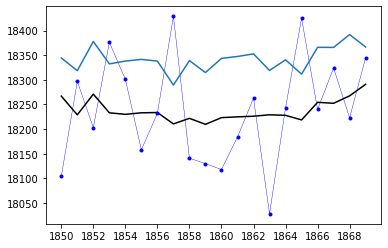

In [11]:

fig,ax = plt.subplots()
ax.plot(curMean,'k')
ax.plot(curData,'b.-',lw=0.4)
ax.plot(curMean+curStd)

# Tests with outliers below

In [12]:
reload(emf)
%matplotlib widget
numYears = 12

In [13]:
dfOut = df.copy()

len(dfOut)
indexToIncrease = np.random.randint(0,len(dfOut),100)

dfOut.iloc[indexToIncrease,:] = dfOut.iloc[indexToIncrease,:]*4
# dfOut

In [14]:
# curData = dfOut.Base4
# curMean,curStd = emf.rnMean(curData,numYears = 12,timeResolution='Month')
# curData = emf.groupByMonth(curData)

curData = dfOut.Base3
curData = curData.rolling(window=7,center=True).mean()

# fig,ax = plt.subplots()
# ax.plot(curData,'.-',ms=2,color='b',lw=0.5)
numYears = 5
curMean,curStd = emf.rnMean(curData,numYears = numYears,timeResolution='Day')



In [15]:
curExc,curZsc = emf.getExcessAndZscore(curData,curMean,curStd)

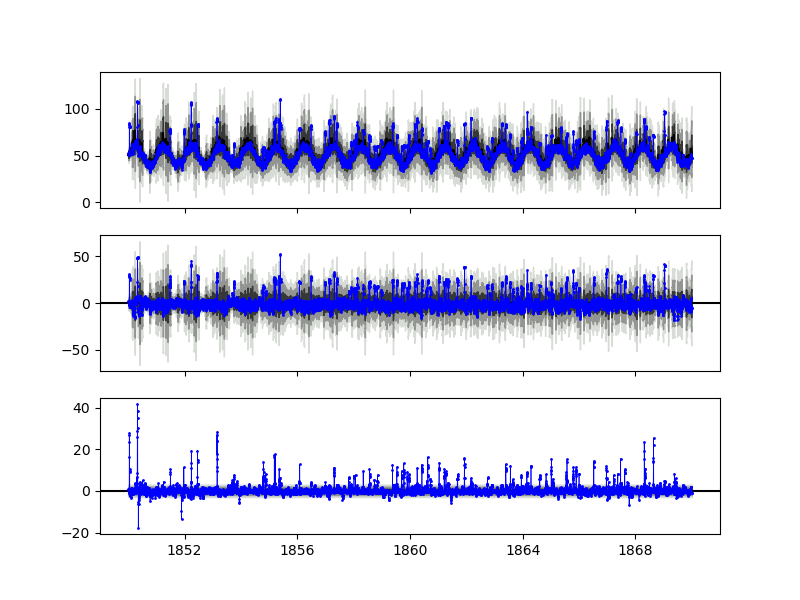

In [16]:
fig,axs = plt.subplots(3,1,figsize=(8,6),sharex=True)
ax1,ax2,ax3 = axs 
ax1.plot(curMean,color='k')
ax1.plot(curData,'.-',ms=2,color='b',lw=0.5)

ax1.fill_between(curData.index,curMean-3*curStd,curMean+3*curStd,color='xkcd:light grey')
ax1.fill_between(curData.index,curMean-2*curStd,curMean+2*curStd,color='xkcd:grey')
ax1.fill_between(curData.index,curMean-curStd,curMean+curStd,color='xkcd:dark grey')


ax2.axhline(0,color='k')
ax2.plot(curExc,'.-',ms=2,color='b',lw=0.5)
ax2.fill_between(curData.index,-3*curStd,+3*curStd,color='xkcd:light grey')
ax2.fill_between(curData.index,-2*curStd,+2*curStd,color='xkcd:grey')
ax2.fill_between(curData.index,-curStd,+curStd,color='xkcd:dark grey')


ax3.axhline(0,color='k')
ax3.plot(curZsc,'.-',ms=2,color='b',lw=0.5)
ax3.fill_between(curData.index,-3*np.ones(curStd.shape),+3*np.ones(curStd.shape),color='xkcd:light grey')
ax3.fill_between(curData.index,-2*np.ones(curStd.shape),+2*np.ones(curStd.shape),color='xkcd:grey')
ax3.fill_between(curData.index,-np.ones(curStd.shape),+np.ones(curStd.shape),color='xkcd:dark grey')



# ax1.set_xlim([
#     np.datetime64('1865-01-01'),
#     np.datetime64('1870-01-01')
# ])
# ax1.plot(curData.loc[curZsc[curZsc > 2].index],'*m')
# ax1.plot(curData.loc[curZsc[curZsc > 3].index],'*r')

In [17]:
curZscoreThreshold = 3

curDataRemove = curData.copy()
curDataRemove.loc[curZsc[curZsc > curZscoreThreshold].index] = np.nan 

# print((curZsc > curZscoreThreshold).sum())
numOutside = (curZsc > curZscoreThreshold).sum()
print(numOutside)

430


In [18]:
reload(emf)

<module 'ExcessMortalityFunctions' from 'c:\\NonSyncedFiles\\GithubRepos\\ExcessMortality\\ExcessMortalityFunctions.py'>

In [19]:
curData = dfOut.Base4.copy()
# curData = curData.rolling(window=7,center=True).mean()
curDataRaw = curData.copy()

In [20]:
numYears = 12

In [21]:

# fig,(ax,ax2) = plt.subplots(2,1,sharex=True,sharey=True)
# ax.plot(curData)
# curMean,curStd = emf.rnMean(curData,numYears=numYears,timeResolution='Day')
# ax.fill_between(curMean.index,curMean - 2* curStd,curMean + 2* curStd,color='xkcd:light grey')
# ax.fill_between(curMean.index,curMean - curStd,curMean + curStd,color='xkcd:grey')
# ax.plot(curMean,'k')

# curData,curMean,curStd = emf.removeAboveThresholdAndRecalculateRepeat(curData,curMean,curStd,ZscoreThreshold=2,numYears=numYears,timeResolution='Day')
# ax2.plot(curData)
# ax2.fill_between(curMean.index,curMean - 2* curStd,curMean + 2* curStd,color='xkcd:light grey')
# ax2.fill_between(curMean.index,curMean - curStd,curMean + curStd,color='xkcd:grey')
# ax2.plot(curMean,'k')

292
148
77
27
11
4
1
0


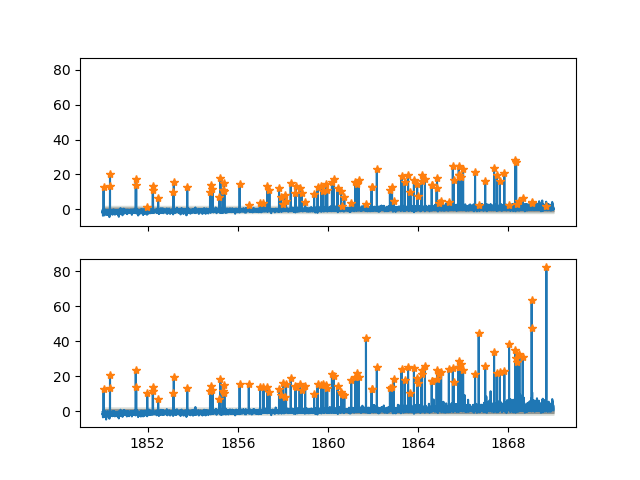

In [22]:

fig,(ax,ax2) = plt.subplots(2,1,sharex=True,sharey=True)
curMean,curStd = emf.rnMean(curData,numYears=numYears,timeResolution='Day')
curExc,curZsc = emf.getExcessAndZscore(curData,curMean,curStd)
ax.plot(curZsc)
ax.fill_between(curMean.index,- 2* np.ones(curStd.shape),+ 2* np.ones(curStd.shape),color='xkcd:light grey')
ax.fill_between(curMean.index,- np.ones(curStd.shape),+ np.ones(curStd.shape),color='xkcd:grey')
# ax.plot(curMean,'k')
ax.plot(curZsc.iloc[indexToIncrease],'*')

curData,curMean,curStd = emf.removeAboveThresholdAndRecalculateRepeat(curData,curMean,curStd,ZscoreThreshold=2,numYears=numYears,timeResolution='Day')
curExc,curZsc = emf.getExcessAndZscore(curData,curMean,curStd)
ax2.plot(curZsc)
ax2.fill_between(curMean.index,- 2* np.ones(curStd.shape),+ 2* np.ones(curStd.shape),color='xkcd:light grey')
ax2.fill_between(curMean.index,- np.ones(curStd.shape),+ np.ones(curStd.shape),color='xkcd:grey')
# ax2.plot(curMean,'k')

ax2.plot(curZsc.iloc[indexToIncrease],'*')

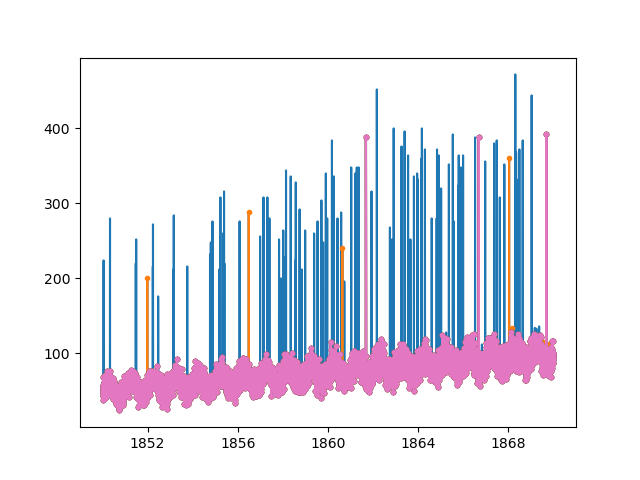

In [23]:

fig,ax = plt.subplots()
ax.plot(curData)
curMean,curStd = emf.rnMean(curData,numYears=numYears,timeResolution='Day')

for k in range(6):
    curData,curMean,curStd = emf.removeAboveThresholdAndRecalculate(curData,curMean,curStd,ZscoreThreshold=3,numYears=numYears,timeResolution='Day')
    ax.plot(curData,'.-')

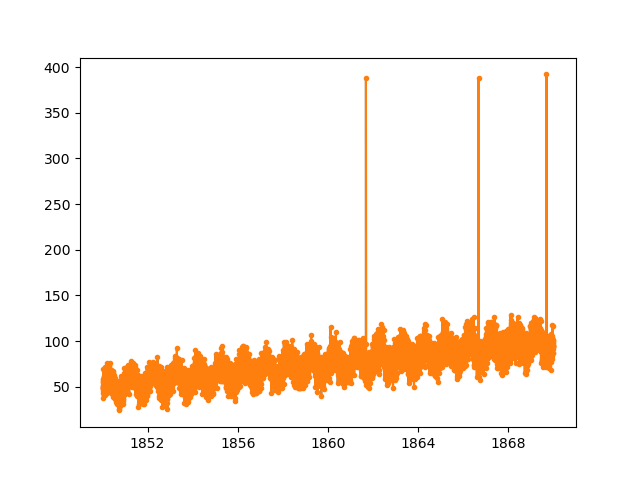

In [24]:
curDataRemove = emf.removeAboveThreshold(curData,curMean,curStd,ZscoreThreshold=3)

fig,ax = plt.subplots()
ax.plot(curData)
ax.plot(curDataRemove,'.-')

In [25]:

while numOutside > 0:

    curMeanRemove,curStdRemove = emf.rnMean(curDataRemove,numYears = numYears,timeResolution='Day')
    curExcRemove,curZscRemove = emf.getExcessAndZscore(curDataRemove,curMeanRemove,curStdRemove)
    # curExcRemove,curZscRemove = emf.getExcessAndZscore(curData,curMeanRemove,curStdRemove)

    curDataRemove.loc[curZscRemove[curZscRemove > curZscoreThreshold].index] = np.nan 
    numOutside = (curZscRemove > curZscoreThreshold).sum()


    # print((curZscRemove > curZscoreThreshold).sum())
    print(numOutside)

0


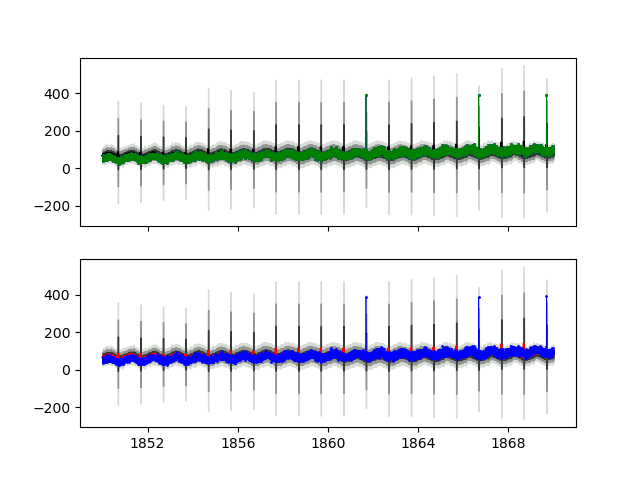

In [26]:
fig,(ax,ax2) = plt.subplots(2,1,sharex=True,sharey=True)
ax.plot(curMean,color='k')
ax2.plot(curMeanRemove,color='r')
# ax.plot(curDataRemove,'.-',ms=2,color='g',lw=0.5)
ax.plot(curData,'.-',ms=2,color='b',lw=0.5)
ax.plot(curDataRemove,'.-',ms=2,color='g',lw=0.5)
ax2.plot(curData,'.-',ms=2,color='b',lw=0.5)

# ax.plot(curMean + curStd,'m',lw=1)
# ax.plot(curMeanRemove + curStdRemove,'g',lw=1)

ax.fill_between(curData.index,curMean-3*curStd,curMean+3*curStd,color='xkcd:light grey')
ax.fill_between(curData.index,curMean-2*curStd,curMean+2*curStd,color='xkcd:grey')
ax.fill_between(curData.index,curMean-1*curStd,curMean+1*curStd,color='xkcd:dark grey')

ax2.fill_between(curData.index,curMeanRemove-3*curStdRemove,curMeanRemove+3*curStdRemove,color='xkcd:light grey')
ax2.fill_between(curData.index,curMeanRemove-2*curStdRemove,curMeanRemove+2*curStdRemove,color='xkcd:grey')
ax2.fill_between(curData.index,curMeanRemove-1*curStdRemove,curMeanRemove+1*curStdRemove,color='xkcd:dark grey')

In [27]:

# # Add columns for year, month and day
# curFrame = dfOut.Base.to_frame()
# curFrame['Year'] = curFrame.index.year 
# curFrame['Month'] = curFrame.index.month
# curFrame['Day'] = curFrame.index.day

# # Organize as pivot-table (with multi-columns)
# curPivot = curFrame.pivot_table(values=dfOut.Base.name,columns=['Month','Day'],index='Year')
# curPivot

In [28]:

# # Add columns for year, month and day
# curFrame = curData.to_frame()
# curFrame['Year'] = curFrame.index.year 
# curFrame['Month'] = curFrame.index.month
# curFrame['Day'] = curFrame.index.day

# # Organize as pivot-table (with multi-columns)
# curPivot = curFrame.pivot_table(values=curData.name,columns=['Month','Day'],index='Year')
# curPivot

In [29]:

# curDataRemoveNoRoll = dfOut.Base
# curDataRemove = curDataRemoveNoRoll.copy()
# curDataRemove = curDataRemove.rolling(window=7,center=True).mean()

numYears = 5
# Add columns for year, month and day
curFrame = curDataRemove.to_frame()
curFrame['Year'] = curFrame.index.year 
curFrame['Month'] = curFrame.index.month
curFrame['Day'] = curFrame.index.day

# Organize as pivot-table (with multi-columns)
curPivot = curFrame.pivot_table(values=curDataRemove.name,columns=['Month','Day'],index='Year')
# curPivot


# Calculate sum of surrounding years and current year
curRolling = curPivot.rolling(window=(numYears*2)+1,center=True,min_periods=1)
curSum = curRolling.sum()
curCount = curRolling.count()
# Calculate mean of surrounding years by subtracting the current year and dividing by the number of surrounding years
curMean = (curSum - curPivot.fillna(0))/(curCount-1)
# curSum
# curCount-1

# Calculate the sum of squares of surrounding years and current year
curRollingSqr = curPivot.pow(2).rolling(window=(numYears*2)+1,center=True,min_periods=1)
curSumSqr = curRollingSqr.sum()
curMeanSqr = (curSumSqr - curPivot.pow(2).fillna(0))/(curCount-1)


# curSumSqr = curPivot.pow(2).rolling(window=(numYears*2)+1,center=True).sum()
# curMeanSqr = (curSumSqr - curPivot.pow(2))/(numYears*2)

# Calculate emperical standard deviation 
curStd = (curMeanSqr - curMean.pow(2).fillna(0)).pow(0.5)

curStd
curSumSqr - curPivot.pow(2).fillna(0)
# curCount
curMeanSqr

Month           1                                                       \
Day             1            2            3            4            5    
Year                                                                     
1850   3047.600000  2993.600000  3807.000000  3262.400000  3333.200000   
1851   3252.333333  3189.500000  3779.333333  3433.500000  3277.000000   
1852   3298.000000  3356.142857  3884.285714  3671.571429  3243.857143   
1853   3363.500000  3386.750000  3802.750000  3665.375000  3786.875000   
1854   3732.555556  3788.000000  4017.444444  3860.222222  3770.888889   
1855   3924.200000  3796.700000  4078.900000  3725.000000  3818.700000   
1856   4318.100000  4445.800000  4501.300000  4146.500000  3940.800000   
1857   4901.000000  4889.500000  4746.800000  4747.800000  4213.600000   
1858   5344.800000  5195.400000  4759.000000  5188.100000  4191.300000   
1859   5310.900000  5548.100000  4719.400000  5462.300000  4943.400000   
1860   6117.400000  6291.900000  5357.300000  6240.200000  5690.400000   
1861   6528.800000  6296.300000  5327.900000  6411.700000  6279.200000   
1862   6691.100000  7020.900000  5705.600000  6740.400000  6514.700000   
1863   7289.600000  7898.500000  6201.500000  7867.300000  6915.900000   
1864   8469.800000  8047.700000  6245.200000  8005.200000  7238.600000   
1865   7965.444444  8239.444444  5854.666667  8039.666667  7207.444444   
1866   8500.000000  8712.375000  6338.500000  8594.125000  7747.250000   
1867   8849.142857  8454.285714  6283.142857  8630.857143  8528.857143   
1868   8737.333333  8387.166667  6355.666667  8274.500000  8870.166667   
1869   8007.200000  9325.200000  6964.400000  9879.000000  8837.000000   

Month                                                                    ...  \
Day              6            7            8            9            10  ...   
Year                                                                     ...   
1850    3558.200000  4575.600000  3600.400000  3951.800000  3785.200000  ...   
1851    3583.833333  4579.666667  3497.666667  4395.833333  3868.500000  ...   
1852    3808.714286  4543.285714  3446.142857  4249.142857  3813.714286  ...   
1853    3722.285714  4363.375000  3633.250000  4641.000000  3980.375000  ...   
1854    4141.250000  4533.666667  3805.555556  4972.111111  3916.000000  ...   
1855    3994.888889  4379.300000  3835.600000  4583.200000  4254.300000  ...   
1856    4331.777778  4778.900000  4231.600000  5043.600000  4526.300000  ...   
1857    4559.666667  4986.500000  4551.200000  5319.900000  5145.100000  ...   
1858    5530.000000  5364.900000  4665.300000  5526.200000  5586.500000  ...   
1859    5276.000000  5177.600000  5000.000000  5659.100000  5903.200000  ...   
1860    5582.500000  5755.500000  5385.000000  6766.000000  6026.400000  ...   
1861    6058.000000  6020.800000  5746.300000  6529.600000  6444.300000  ...   
1862    6204.500000  6148.800000  6561.400000  7038.400000  6462.600000  ...   
1863    6231.857143  6513.300000  6965.000000  7064.800000  7031.400000  ...   
1864    6279.285714  7223.400000  7468.300000  7276.700000  7443.600000  ...   
1865    7606.333333  6805.888889  7647.444444  6701.222222  7703.555556  ...   
1866    6321.800000  7072.875000  7920.250000  7458.875000  7688.500000  ...   
1867    6991.000000  7707.285714  7691.714286  7342.285714  8073.714286  ...   
1868    9480.333333  7729.666667  8791.500000  7658.000000  7585.666667  ...   
1869   10692.500000  8179.400000  8736.000000  8159.800000  7809.800000  ...   

Month           12                                                       \
Day             22           23           24            25           26   
Year                                                                      
1850   3428.000000  2767.600000  4074.000000   3853.600000  3601.250000   
1851   3524.833333  2949.333333  4291.166667   3846.000000  4367.600000   
1852   3993.857143  3212.000000  3912.000000   4083.000000  3797.166667   
1853  

In [30]:
# curPivot
# curCount -1
# curSum - curPivot.fillna(0)
# curSumSqr - curPivot.pow(2).fillna(0)
# curMeanSqr
# curMeanSqr - curMean.pow(2).fillna(0)
# curMean
# curCount

# curPivot

In [31]:
numYears = 5
# Add columns for year, month and day
curFrame = curDataRemove.to_frame()
curFrame['Year'] = curFrame.index.year 
curFrame['Month'] = curFrame.index.month
curFrame['Day'] = curFrame.index.day

# Organize as pivot-table (with multi-columns)
curPivot = curFrame.pivot_table(values=curDataRemove.name,columns=['Month','Day'],index='Year')
curPivot

# Calculate sum of surrounding years and current year
curRolling = curPivot.rolling(window=(numYears*2)+1,center=True,min_periods=1)
curSum = curRolling.sum()
curCount = curRolling.count()
# Calculate mean of surrounding years by subtracting the current year and dividing by the number of surrounding years
curMean = (curSum - curPivot.fillna(0))/(curCount-1)
# curMean = (curSum - curPivot)/(numYears*2)

# Calculate the sum of squares of surrounding years and current year
curRollingSqr = curPivot.pow(2).rolling(window=(numYears*2)+1,center=True,min_periods=1)
curSumSqr = curRollingSqr.sum()
curMeanSqr = (curSumSqr - curPivot.pow(2).fillna(0))/(curCount-1)


# curSumSqr = curPivot.pow(2).rolling(window=(numYears*2)+1,center=True).sum()
# curMeanSqr = (curSumSqr - curPivot.pow(2))/(numYears*2)

# Calculate emperical standard deviation 
curStd = (curMeanSqr - curMean.pow(2).fillna(0)).pow(0.5)

# curPivot.rolling(window=(numYears*2)+1,center=True,min_periods=numYears).count()
# curSum/curCount
# curRolling.mean()
# curCount
# curMean

# curPivot
# curSum - curPivot.fillna(0)

# curRollingSqr.sum()
# curMeanSqr - curM 
# curMeanScurMean.pow(2)
# curStd
curMeanSqr - curMean.pow(2).fillna(0)

curCount 

Month    1                                                         ...    12  \
Day      1     2     3     4     5     6     7     8     9     10  ...    22   
Year                                                               ...         
1850    6.0   6.0   6.0   6.0   6.0   6.0   6.0   6.0   6.0   6.0  ...   6.0   
1851    7.0   7.0   7.0   7.0   7.0   7.0   7.0   7.0   7.0   7.0  ...   7.0   
1852    8.0   8.0   8.0   8.0   8.0   8.0   8.0   8.0   8.0   8.0  ...   8.0   
1853    9.0   9.0   9.0   9.0   9.0   8.0   9.0   9.0   9.0   9.0  ...   9.0   
1854   10.0  10.0  10.0  10.0  10.0   9.0  10.0  10.0  10.0  10.0  ...  10.0   
1855   11.0  11.0  11.0  11.0  11.0  10.0  11.0  11.0  11.0  11.0  ...  11.0   
1856   11.0  11.0  11.0  11.0  11.0  10.0  11.0  11.0  11.0  11.0  ...  11.0   
1857   11.0  11.0  11.0  11.0  11.0  10.0  11.0  11.0  11.0  11.0  ...  11.0   
1858   11.0  11.0  11.0  11.0  11.0  10.0  11.0  11.0  11.0  11.0  ...  11.0   
1859   11.0  11.0  11.0  11.0  11.0  10.0  11.0  11.0  11.0  11.0  ...  11.0   
1860   11.0  11.0  11.0  11.0  11.0   9.0  11.0  11.0  11.0  11.0  ...  11.0   
1861   11.0  11.0  11.0  11.0  11.0   9.0  11.0  11.0  11.0  11.0  ...  11.0   
1862   11.0  11.0  11.0  11.0  11.0   9.0  11.0  11.0  11.0  11.0  ...  11.0   
1863   11.0  11.0  11.0  11.0  11.0   8.0  11.0  11.0  11.0  11.0  ...  10.0   
1864   11.0  11.0  11.0  11.0  11.0   8.0  11.0  11.0  11.0  11.0  ...  10.0   
1865   10.0  10.0  10.0  10.0  10.0   7.0  10.0  10.0  10.0  10.0  ...   9.0   
1866    9.0   9.0   9.0   9.0   9.0   6.0   9.0   9.0   9.0   9.0  ...   8.0   
1867    8.0   8.0   8.0   8.0   8.0   5.0   8.0   8.0   8.0   8.0  ...   7.0   
1868    7.0   7.0   7.0   7.0   7.0   4.0   7.0   7.0   7.0   7.0  ...   6.0   
1869    6.0   6.0   6.0   6.0   6.0   3.0   6.0   6.0   6.0   6.0  ...   5.0   

Month                                                        
Day      23    24    25    26    27    28    29    30    31  
Year                                                         
1850    6.0   6.0   6.0   5.0   6.0   6.0   6.0   6.0   6.0  
1851    7.0   7.0   7.0   6.0   6.0   7.0   7.0   7.0   7.0  
1852    8.0   8.0   8.0   7.0   7.0   8.0   8.0   8.0   8.0  
1853    9.0   9.0   9.0   8.0   7.0   9.0   9.0   9.0   9.0  
1854   10.0  10.0  10.0   9.0   8.0  10.0  10.0  10.0  10.0  
1855   11.0  11.0  11.0  10.0   9.0  11.0  11.0  11.0  11.0  
1856   11.0  11.0  11.0  10.0   9.0  11.0  11.0  11.0  11.0  
1857   11.0  11.0  11.0  11.0   9.0  11.0  11.0  11.0  11.0  
1858   11.0  11.0  11.0  10.0   9.0  11.0  11.0  11.0  11.0  
1859   11.0  11.0  11.0  10.0   9.0  11.0  11.0  11.0  11.0  
1860   11.0  11.0  11.0  10.0   9.0  10.0  11.0  11.0  11.0  
1861   11.0  11.0  11.0  10.0   9.0  10.0  11.0  11.0  11.0  
1862   11.0  11.0  11.0  10.0  10.0  10.0  11.0  11.0  11.0  
1863   11.0  10.0  11.0  10.0  10.0  10.0  11.0  11.0  11.0  
1864   11.0  10.0  11.0  10.0  11.0  10.0  11.0  11.0  11.0  
1865   10.0   9.0  10.0   9.0  10.0   9.0  10.0  10.0  10.0  
1866    9.0   8.0   9.0   8.0   9.0   8.0   9.0   9.0   9.0  
1867    8.0   7.0   8.0   7.0   8.0   7.0   8.0   8.0   8.0  
1868    7.0   6.0   7.0   6.0   7.0   6.0   7.0   7.0   7.0  
1869    6.0   5.0   6.0   6.0   6.0   5.0   6.0   6.0   6.0  

[20 rows x 366 columns]

In [32]:

# For leap days, use the average of February 28th and March 1st (Leap-days in non-leap-years will be removed below anyways)
curMean.loc[:,(2,29)] = (curMean.loc[:,(2,28)] + curMean.loc[:,(3,1)])/2
curStd.loc[:,(2,29)] = (curStd.loc[:,(2,28)] + curStd.loc[:,(3,1)])/2

# Reshape pivottables into series
curMean = curMean.reset_index().melt(id_vars='Year') # Melt pivottable
curMean['Date'] = pd.to_datetime(dict(year=curMean.Year,month=curMean.Month,day=curMean.Day),errors='coerce') # Make a date-columns (coerce "false" leap-days to NaT, i.e. in non-leap years)
curMean = curMean.sort_values('Date').set_index('Date').drop(columns=['Year','Month','Day']).rename(columns={'value':'Baseline'}).iloc[:,0] # Sort by date and drop extra columns
curMean = curMean.loc[curMean.index.notna()] # Remove invalid dates (leap-days in not leap-years)

curStd = curStd.reset_index().melt(id_vars='Year') # Melt pivottable
curStd['Date'] = pd.to_datetime(dict(year=curStd.Year,month=curStd.Month,day=curStd.Day),errors='coerce') # Make a date-columns (coerce "false" leap-days to NaT, i.e. in non-leap years)
curStd = curStd.sort_values('Date').set_index('Date').drop(columns=['Year','Month','Day']).rename(columns={'value':'StandardDeviation'}).iloc[:,0] # Sort by date and drop extra columns
curStd = curStd.loc[curStd.index.notna()] # Remove invalid dates (leap-days in not leap-years)



In [33]:
curStdRemove.loc[np.datetime64('1870-02-21'):].iloc[:20]
# curMeanRemove.loc[np.datetime64('1870-02-21'):].iloc[:20]
curMean.loc[np.datetime64('1870-02-21'):].iloc[:20]
curStd.loc[np.datetime64('1870-02-21'):].iloc[:20]

Series([], Name: StandardDeviation, dtype: float64)

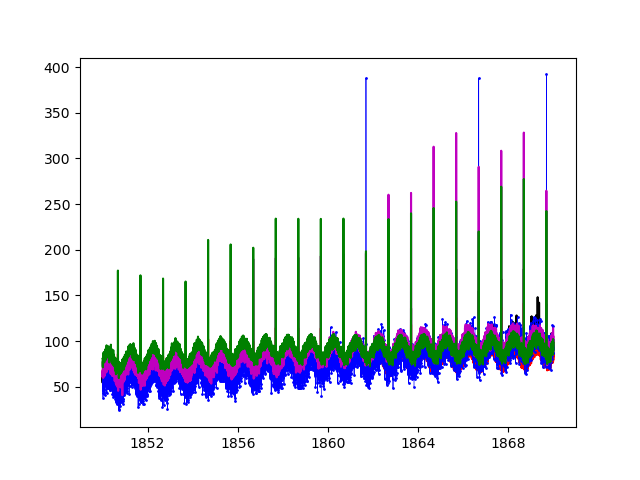

In [34]:
fig,ax = plt.subplots()
ax.plot(curMean,color='k')
ax.plot(curMeanRemove,color='r')
ax.plot(curData,'.-',ms=2,color='b',lw=0.5)

ax.plot(curMean + curStd,'m')
ax.plot(curMeanRemove + curStdRemove,'g')

# ax.fill_between(curData.index,curMeanRemove-3*curStdRemove,curMeanRemove+3*curStdRemove,color='xkcd:light grey')

In [35]:
# pdSeries = dfOut.Base4

# pdSeriesRoll = pdSeries.rolling(window=7,center=True).mean()

# fig,ax = plt.subplots()
# ax.plot(pdSeries)
# ax.plot(pdSeriesRoll)

In [36]:
pdSeries = dfOut.Base4

# pdSeries = pdSeries.rolling(window=7,center=True).mean()

# Add columns for year, month and day
curFrame = pdSeries.to_frame()
curFrame['Year'] = curFrame.index.year 
curFrame['Month'] = curFrame.index.month
curFrame['Day'] = curFrame.index.day

# Organize as pivot-table (with multi-columns)
curPivot = curFrame.pivot_table(values=pdSeries.name,columns=['Month','Day'],index='Year')

# Calculate sum of surrounding years and current year
curSum = curPivot.rolling(window=(numYears*2)+1,center=True).sum()
# Calculate mean of surrounding years by subtracting the current year and dividing by the number of surrounding years
curMean = (curSum - curPivot)/(numYears*2)

# Calculate the sum of squares of surrounding years and current year
curSumSqr = curPivot.pow(2).rolling(window=(numYears*2)+1,center=True).sum()
curMeanSqr = (curSumSqr - curPivot.pow(2))/(numYears*2)

# Calculate emperical standard deviation 
curStd = (curMeanSqr - curMean.pow(2)).pow(0.5)

# For leap days, use the average of February 28th and March 1st (Leap-days in non-leap-years will be removed below anyways)
curMean.loc[:,(2,29)] = (curMean.loc[:,(2,28)] + curMean.loc[:,(3,1)])/2
curStd.loc[:,(2,29)] = (curStd.loc[:,(2,28)] + curStd.loc[:,(3,1)])/2


# fig,ax = plt.subplots()
# ax.plot()
curPivot

Month     1                                                                \
Day       1      2     3      4      5      6      7      8      9     10   
Year                                                                        
1850    58.0   51.0  49.0   49.0   50.0   52.0   43.0   38.0   55.0  55.0   
1851    53.0   49.0  57.0   51.0   60.0   59.0   55.0   48.0   53.0  58.0   
1852    51.0   49.0  52.0   49.0   58.0   58.0   60.0   56.0   68.0  60.0   
1853    50.0   55.0  64.0   50.0   50.0   63.0   64.0   63.0   59.0  53.0   
1854    52.0   54.0  69.0   59.0   59.0   44.0   69.0   63.0   54.0  72.0   
1855    68.0   65.0  65.0   73.0   61.0   71.0   86.0   68.0   77.0  63.0   
1856    61.0   63.0  67.0   67.0   64.0   67.0   76.0   62.0   80.0  68.0   
1857    58.0   66.0  63.0   70.0   53.0   71.0   70.0   63.0   72.0  61.0   
1858    61.0   65.0  68.0   61.0   82.0  264.0   60.0   76.0   79.0  66.0   
1859    83.0   83.0  80.0   80.0   68.0   71.0   81.0   72.0   84.0  76.0   
1860    87.0   72.0  64.0   66.0   67.0   77.0   75.0   69.0   64.0  78.0   
1861    80.0   94.0  83.0   76.0   64.0   72.0   65.0   68.0   90.0  80.0   
1862    91.0   85.0  72.0   95.0   71.0   78.0   65.0   75.0   66.0  93.0   
1863    86.0   73.0  59.0   75.0   84.0   84.0   78.0   78.0   88.0  93.0   
1864    73.0   96.0  74.0   89.0   89.0   82.0   72.0   82.0   75.0  86.0   
1865   107.0   93.0  94.0   96.0  104.0  320.0   98.0   86.0  105.0  82.0   
1866    87.0   89.0  82.0   92.0   96.0   90.0   93.0   90.0   87.0  92.0   
1867    85.0   98.0  81.0  105.0   86.0   81.0   84.0  114.0   88.0  84.0   
1868    92.0  106.0  85.0  113.0   94.0   99.0  102.0   92.0   94.0  97.0   
1869   116.0   98.0  84.0   86.0  104.0  108.0   99.0  107.0   79.0  85.0   

Month  ...     12                                                         \
Day    ...     22     23     24     25     26     27     28     29    30   
Year   ...                                                                 
1850   ...   49.0   63.0   54.0   47.0   53.0   44.0   55.0   70.0  47.0   
1851   ...   61.0   56.0   42.0   55.0  200.0   58.0   51.0   53.0  65.0   
1852   ...   63.0   52.0   64.0   52.0   64.0   47.0   64.0   43.0  42.0   
1853   ...   52.0   49.0   62.0   73.0   52.0   53.0   62.0   59.0  65.0   
1854   ...   55.0   59.0   71.0   67.0   57.0   57.0   63.0   61.0  69.0   
1855   ...   61.0   46.0   75.0   61.0   66.0   70.0   67.0   55.0  67.0   
1856   ...   73.0   55.0   65.0   68.0   68.0  256.0   63.0   71.0  63.0   
1857   ...   84.0   66.0   63.0   72.0   71.0   71.0   77.0   90.0  76.0   
1858   ...   73.0   81.0   63.0   71.0   56.0  264.0   66.0   76.0  81.0   
1859   ...   59.0   63.0   72.0   70.0   75.0   72.0   73.0   77.0  70.0   
1860   ...   75.0   70.0   81.0   71.0   77.0   81.0   69.0   76.0  91.0   
1861   ...   64.0   94.0   81.0   91.0   93.0   82.0   81.0   93.0  83.0   
1862   ...   82.0   91.0   57.0   79.0   87.0   72.0   71.0   85.0  78.0   
1863   ...   81.0   68.0   82.0   78.0  332.0   89.0   83.0   80.0  93.0   
1864   ...   88.0  105.0   85.0   91.0   90.0   70.0   84.0   89.0  93.0   
1865   ...   70.0   84.0   86.0   94.0   94.0   85.0  364.0   83.0  81.0   
1866   ...   85.0   90.0   90.0   86.0  101.0   82.0   70.0   89.0  94.0   
1867   ...   79.0   98.0   88.0  113.0  110.0   91.0   96.0  100.0  90.0   
1868   ...  111.0   98.0  122.0  120.0   97.0   96.0   99.0  102.0  96.0   
1869   ...   98.0   91.0   93.0  101.0   95.0  101.0   99.0   96.0  93.0   

Month         
Day       31  
Year          
1850    47.0  
1851    52.0  
1852    62.0  
1853    61.0  
1854    54.0  
1855    76.0  
1856    63.0  
1857    73.0  
1858    78.0  
1859    80.0  
1860    54.0  
1861    90.0  
1862    63.0  
1863    86.0  
1864    98.0  
1865    79.0  
1866   108.0  
1867    93.0  
1868    98.0  
1869    87.0  

[20 rows x 366 columns]

In [37]:

# pdSeries = df.Base
# curFrame = pdSeries.to_frame()
# curFrame['Year'] = curFrame.index.year 
# curFrame['Month'] = curFrame.index.month
# curFrame['Day'] = curFrame.index.day
# curFrame['Week'] = curFrame.index.isocalendar()
# # curFrame.pivot_table(values=pdSeries.name,index=['Month','Day'],columns='Year')
# # curPivot = curFrame.pivot_table(values=pdSeries.name,columns=['Month','Day'],index='Year')
# # curPivot
# curFrame

In [38]:
pdSeries = df.Base


isoCal = pdSeries.index.isocalendar()


curFrame = pdSeries.to_frame().join(isoCal)
curFrameWeek = curFrame.groupby([curFrame.year,curFrame.week]).sum().drop(columns='day')
curPivot = curFrameWeek.pivot_table(pdSeries.name,index='year',columns='week')


# Calculate sum of surrounding years and current year
curSum = curPivot.rolling(window=(numYears*2)+1,center=True).sum()
# Calculate mean of surrounding years by subtracting the current year and dividing by the number of surrounding years
curMean = (curSum - curPivot)/(numYears*2)

# Calculate the sum of squares of surrounding years and current year
curSumSqr = curPivot.pow(2).rolling(window=(numYears*2)+1,center=True).sum()
curMeanSqr = (curSumSqr - curPivot.pow(2))/(numYears*2)

# Calculate emperical standard deviation 
curStd = (curMeanSqr - curMean.pow(2)).pow(0.5)


# Reshape pivottables into series
curMean = curMean.reset_index().melt(id_vars='year') # Melt pivottable
curMean['Date'] = pd.to_datetime(curMean.year.astype(str)+'-'+curMean.week.astype(str).str.zfill(2)+'-1',format='%G-%V-%w') # Determine date from year and week number
curMean = curMean.sort_values('Date').set_index('Date').drop(columns=['year','week']).rename(columns={'value':'Baseline'}).iloc[:,0] # Sort by date and drop extra columns
curStd = curStd.reset_index().melt(id_vars='year') # Melt pivottable
curStd['Date'] = pd.to_datetime(curStd.year.astype(str)+'-'+curStd.week.astype(str).str.zfill(2)+'-1',format='%G-%V-%w') # Determine date from year and week number
curStd = curStd.sort_values('Date').set_index('Date').drop(columns=['year','week']).rename(columns={'value':'StandardDeviation'}).iloc[:,0] # Sort by date and drop extra columns

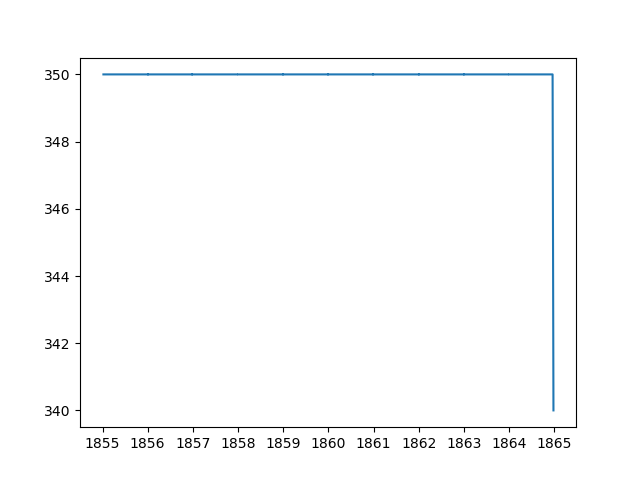

In [39]:
fig,ax = plt.subplots()
ax.plot(curMean)

In [41]:
# curMean.year.astype(str)+'-'+curMean.week.astype(str).str.zfill(2)+'-1'

In [ ]:
# pd.to_datetime('1889-53-1',format='%G-%V-%w')

In [ ]:
curMean

,year,week,value,day
0,1850,1,NaN,1.0
41,1850,2,NaN,1.0
82,1850,3,NaN,1.0
123,1850,4,NaN,1.0
164,1850,5,NaN,1.0
...,...,...,...,...
2008,1890,49,NaN,1.0
2049,1890,50,NaN,1.0
2090,1890,51,NaN,1.0
2131,1890,52,NaN,1.0


In [ ]:
curData = df.Base4 
curData = df.Base4.rolling(window=7,center=True).mean()
curMean,curStd = emf.rnMean(curData,timeResolution='Day')

TypeError: cannot perform __rmul__ with this index type: DatetimeArray

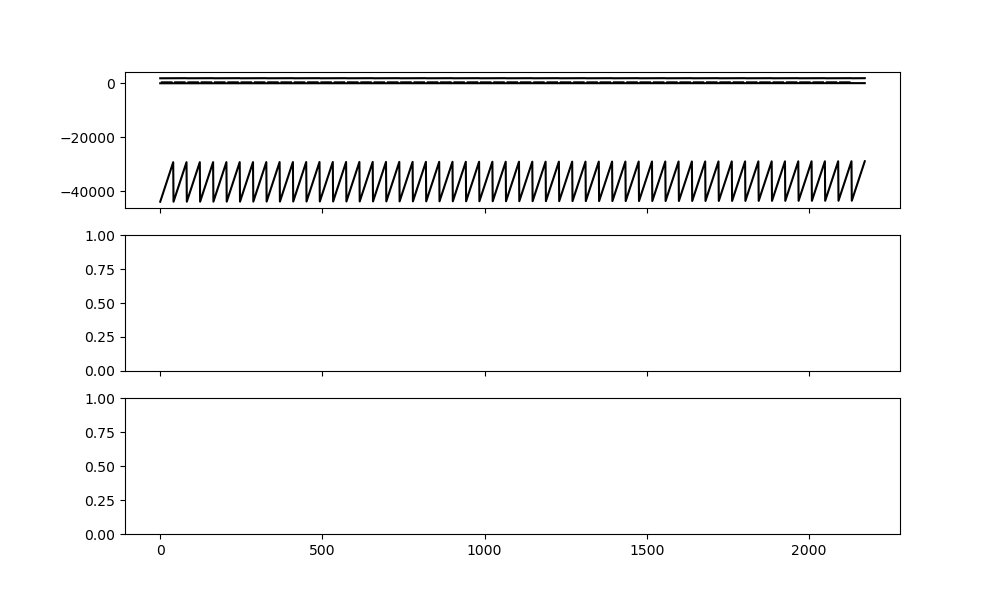

In [ ]:

# fig,ax = plt.subplots()
# ax.plot(curMean)
# ax.plot(curData,'.')

fig,(ax,ax2,ax3) = plt.subplots(3,1,figsize=(10,6),sharex=True)
ax.plot(curMean,color='k')
ax.fill_between(x=curMean.index,y1=curMean-3*curStd,y2=curMean+3*curStd,color='xkcd:light gray')
ax.fill_between(x=curMean.index,y1=curMean-2*curStd,y2=curMean+2*curStd,color='xkcd:gray')
ax.fill_between(x=curMean.index,y1=curMean-curStd,y2=curMean+curStd,color='xkcd:dark gray')
ax.plot(curData,'.-',lw=0.5)
# ax.plot(curMean2)
ax2.axhline(0,color='k')
ax2.plot(curData-curMean,'.-',lw=0.5)

ax3.plot((curData-curMean).cumsum())

fig.tight_layout()


In [ ]:
numYears = 5

pdSeries = df.Base
curFrame = pdSeries.to_frame()
curFrame['Year'] = curFrame.index.year 
curFrame['Month'] = curFrame.index.month
curFrame['Day'] = curFrame.index.day
# curFrame.pivot_table(values=pdSeries.name,index=['Month','Day'],columns='Year')
curPivot = curFrame.pivot_table(values=pdSeries.name,columns=['Month','Day'],index='Year')
curPivot

# Calculate sum of surrounding years and current year
curSum = curPivot.rolling(window=(numYears*2)+1,center=True).sum()
# Calculate mean of surrounding years by subtracting the current year and dividing by the number of surrounding years
curMean = (curSum - curPivot)/(numYears*2)

# Calculate the sum of squares of surrounding years and current year
curSumSqr = curPivot.pow(2).rolling(window=(numYears*2)+1,center=True).sum()
curMeanSqr = (curSumSqr - curPivot.pow(2))/(numYears*2)

# Calculate emperical standard deviation 
curStd = (curMeanSqr - curMean.pow(2)).pow(0.5)

curMean.iloc[:,50:]


# # Reshape pivottables into series
# curMean = curMean.reset_index().melt(id_vars='Year') # Melt pivottable
# curMean['Date'] = pd.to_datetime(dict(year=curMean.Year,month=curMean.Month,day=curMean.Day),errors='coerce') # Make a date-columns (coerce "false" leap-days to NaT, i.e. in non-leap years)
# curMean = curMean.sort_values('Date').set_index('Date').drop(columns=['Year','Month','Day']).rename(columns={'value':'Baseline'}).iloc[:,0] # Sort by date and drop extra columns
# curMean = curMean.loc[curMean.index.notna()] # Remove invalid dates (leap-days in not leap-years)
# # curStd = curStd.reset_index().melt(id_vars='Year')
# # curStd['Date'] = pd.to_datetime(dict(year=curStd.Year,month=curStd.Month,day=np.ones(len(curStd.Year))))
# # curStd = curStd.sort_values('Date').set_index('Date').drop(columns=['Year','Month']).rename(columns={'value':'StandardDeviation'}).iloc[:,0]

# # curMean = curMean[~(curMean.Day == 29) & (curMean.Month == 2)] 

curMean.loc[:,(2,29)] = (curMean.loc[:,(2,28)] + curMean.loc[:,(3,1)])/2
curMean.iloc[:,55:]

Month    2                              3                           ...    12  \
Day      25    26    27    28     29    1     2     3     4     5   ...    22   
Year                                                                ...         
1850    NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1851    NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1852    NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1853    NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1854    NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1855   49.6  47.4  51.1  51.8  53.95  56.1  49.6  51.9  46.9  50.0  ...  49.1   
1856   52.2  48.5  50.8  51.8  53.60  55.4  48.4  47.8  49.3  51.4  ...  46.9   
1857   51.9  45.8  51.0  49.6  52.30  55.0  48.6  48.5  48.8  51.3  ...  48.5   
1858   53.6  46.4  49.6  50.7  51.70  52.7  48.4  47.2  49.0  50.7  ...  48.4   
1859   52.9  47.1  47.0  48.8  51.35  53.9  47.2  49.0  49.7  47.1  ...  49.1   
1860   51.4  46.8  48.9  48.4  50.40  52.4  48.5  49.5  48.8  46.5  ...  48.1   
1861   50.5  46.5  50.4  48.8  51.90  55.0  50.9  51.1  48.1  44.8  ...  50.0   
1862   51.5  48.9  49.2  49.7  52.40  55.1  49.3  49.0  48.1  47.6  ...  48.6   
1863   51.4  48.3  51.8  47.4  51.90  56.4  48.5  48.2  48.0  47.2  ...  48.1   
1864   53.1  49.3  50.6  47.8  50.75  53.7  49.2  46.3  47.4  48.7  ...  48.9   
1865   54.6  50.6  47.7  47.8  51.15  54.5  46.6  46.3  48.5  48.0  ...  50.7   
1866   52.1  50.4  47.4  45.7  49.60  53.5  45.7  47.6  47.3  49.2  ...  50.9   
1867   50.7  50.6  48.4  45.9  49.75  53.6  49.4  50.1  49.0  47.2  ...  52.8   
1868   48.9  52.5  48.5  47.3  50.10  52.9  48.8  52.9  49.3  47.3  ...  53.7   
1869   47.7  52.8  53.0  46.8  51.05  55.3  49.5  54.4  49.2  48.1  ...  53.7   
1870   46.9  54.3  52.6  46.1  50.35  54.6  50.7  54.3  48.7  49.8  ...  52.5   
1871   49.9  54.2  52.6  47.5  51.45  55.4  49.5  52.3  50.5  50.9  ...  53.8   
1872   49.2  54.0  52.2  46.4  50.40  54.4  46.0  51.3  48.1  52.7  ...  54.1   
1873   48.5  53.2  52.5  45.7  49.60  53.5  48.0  49.9  49.4  52.8  ...  54.6   
1874   46.7  51.1  50.8  45.2  49.35  53.5  46.7  49.8  48.2  50.4  ...  54.4   
1875   46.1  50.4  51.8  46.0  49.90  53.8  47.9  50.9  48.0  51.0  ...  55.6   
1876   42.8  51.8  51.2  45.1  48.65  52.2  49.0  52.2  46.7  51.4  ...  52.6   
1877   44.9  51.0  50.6  45.9  50.05  54.2  50.4  51.2  50.9  52.5  ...  52.6   
1878   46.2  51.4  48.1  46.2  50.25  54.3  48.3  51.4  49.6  51.7  ...  51.8   
1879   46.7  52.7  48.9  47.9  49.90  51.9  49.6  50.3  51.4  53.2  ...  50.8   
1880   46.5  50.1  49.0  46.0  49.15  52.3  48.1  49.4  52.1  50.9  ...  50.6   
1881   48.5  49.5  46.9  48.8  50.10  51.4  48.6  47.1  52.5  50.3  ...  51.5   
1882   46.9  49.1  47.5  49.8  49.20  48.6  48.3  47.6  49.4  47.6  ...  48.4   
1883   48.2  48.6  47.5  50.3  49.50  48.7  50.0  46.7  50.6  50.5  ...  48.7   
1884   49.7  49.3  44.9  49.9  50.25  50.6  49.4  49.4  51.5  50.0  ...  49.1   
1885    NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1886    NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1887    NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1888    NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1889    NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

Month                                                        
Day      23    24    25    26    27    28    29    30    31  
Year                                                         
1850    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1851    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1852    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1853    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1854    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1855   53.1  45.8  4

In [ ]:
df.groupby(pd.Grouper(freq='1M')).sum()
dfMonth = df.groupby([df.index.year.rename('Year'),df.index.month.rename('Month')]).sum()
dfMonth


Base  Base2   Base3   Base4
Year Month                             
1850 1      1520   1541  1562.0  1727.0
     2      1393   1345  1628.0  1609.0
     3      1559   1601  1878.0  1824.0
     4      1516   1523  1774.0  1821.0
     5      1585   1626  1783.0  1713.0
...          ...    ...     ...     ...
1889 8      1479   3086  1292.0  2892.0
     9      1493   2969  1220.0  2646.0
     10     1536   3093  1243.0  2784.0
     11     1486   3017  1309.0  2747.0
     12     1579   3171  1491.0  3033.0

[480 rows x 4 columns]

In [ ]:

# curTest  = df.Base

# # # # Start by grouping data by month, in case its daily
# curTest = curTest.groupby([curTest.index.year.rename('Year'),curTest.index.month.rename('Month')]).sum()
# curTest = curTest.reset_index()
# # # curTest = curTest.reset_index().melt(id_vars='Year')
# curTest['Date'] = pd.to_datetime(dict(year=curTest.Year,month=curTest.Month,day=np.ones(len(curTest.Year))))
# # curTest = curTest.sort_values('Date').set_index('Date').drop(columns=['Year','Month']).rename(columns={'Base':'Baseline'})

# curTest = curTest.drop(columns=['Year','Month']).set_index('Date')
# curTest = curTest.iloc[:,0]

In [ ]:
# curData-curMean
# curData 


In [ ]:
pdSeries = df.Base
serMonth = pdSeries.groupby([pdSeries.index.year.rename('Year'),pdSeries.index.month.rename('Month')]).sum()
serMonth

Year  Month
1850  1        1520
      2        1393
      3        1559
      4        1516
      5        1585
               ... 
1889  8        1479
      9        1493
      10       1536
      11       1486
      12       1579
Name: Base, Length: 480, dtype: int32

In [ ]:
pdSeries = df.Base2
serYear = pdSeries.groupby(pdSeries.index.year.rename('Year')).sum()
serYear.rolling(window=7).sum()

numYears = 5
# Calculate sum of surrounding years and current year
curSum = serYear.rolling(window=(numYears*2)+1,center=True).sum()
# Calculate mean of surrounding years by subtracting the current year and dividing by the number of surrounding years
curMean = (curSum - serYear)/(numYears*2)

# Calculate the sum of squares of surrounding years and current year
curSumSqr = serYear.pow(2).rolling(window=(numYears*2)+1,center=True).sum()
curMeanSqr = (curSumSqr - serYear.pow(2))/(numYears*2)

# Calculate emperical standard deviation 
curStd = (curMeanSqr - curMean.pow(2)).pow(0.5)

curData = emf.groupByYear(pdSeries)


curMean = curMean.reset_index()
curMean['Date'] = pd.to_datetime(dict(year=curMean.Year,month=np.ones(len(curMean.Year)),day=np.ones(len(curMean.Year))))
curMean = curMean.sort_values('Date').set_index('Date').drop(columns=['Year']).rename(columns={'value':'Baseline'}).iloc[:,0]
curMean
# serYear

Date
1850-01-01        NaN
1851-01-01        NaN
1852-01-01        NaN
1853-01-01        NaN
1854-01-01        NaN
1855-01-01    20760.6
1856-01-01    21253.8
1857-01-01    21710.0
1858-01-01    22160.3
1859-01-01    22578.6
1860-01-01    23031.5
1861-01-01    23484.1
1862-01-01    23954.4
1863-01-01    24426.0
1864-01-01    24895.4
1865-01-01    25370.5
1866-01-01    25770.5
1867-01-01    26226.2
1868-01-01    26677.9
1869-01-01    27141.9
1870-01-01    27584.0
1871-01-01    28135.1
1872-01-01    28564.2
1873-01-01    29002.8
1874-01-01    29438.8
1875-01-01    29894.0
1876-01-01    30290.9
1877-01-01    30809.2
1878-01-01    31272.0
1879-01-01    31729.4
1880-01-01    32124.8
1881-01-01    32533.8
1882-01-01    32986.1
1883-01-01    33456.3
1884-01-01    33920.4
1885-01-01        NaN
1886-01-01        NaN
1887-01-01        NaN
1888-01-01        NaN
1889-01-01        NaN
Name: Base2, dtype: float64

In [ ]:
curMean

curMean,curStd = emf.rnMean(df.Base2,timeResolution='Year')
curData = emf.groupByYear(df.Base2)
# curData
# curMean
# # curStd
# # curMean - curData 
# curMean 
# curData.index

In [ ]:
pdSeries.index[((curDates.month == 2) & (curDates.day == 29))]

DatetimeIndex(['1852-02-29', '1856-02-29', '1860-02-29', '1864-02-29',
               '1868-02-29', '1872-02-29', '1876-02-29', '1880-02-29',
               '1884-02-29', '1888-02-29'],
              dtype='datetime64[ns]', freq=None)

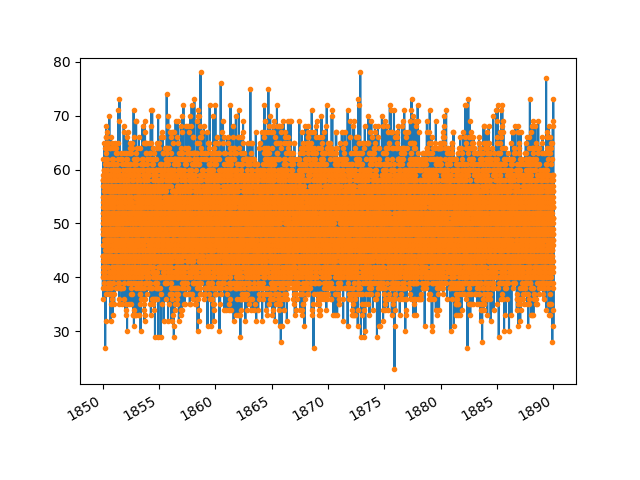

In [ ]:
pdSeries = df.Base
curDates = pdSeries.index
nonLeapDay = ~((curDates.month == 2) & (curDates.day == 29))
pdSeries.loc[nonLeapDay]

fig,ax = plt.subplots()
pdSeries.loc[nonLeapDay].plot(ax=ax)
ax.plot(pdSeries.loc[nonLeapDay],'.')

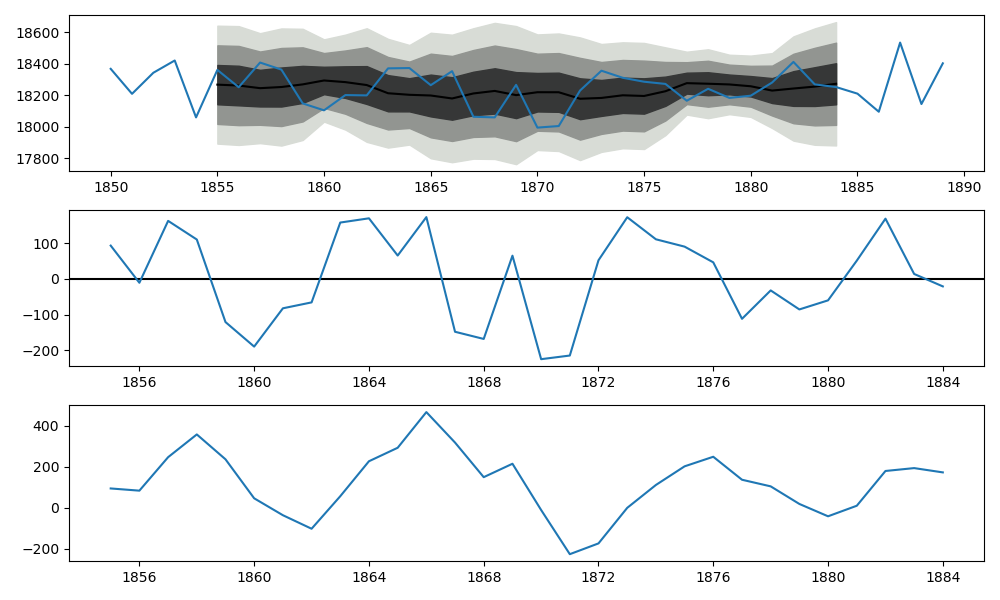

In [ ]:

curData = emf.groupByYear(df.Base3)
curMean,curStd = emf.rnMean(curData,timeResolution='Year')

fig,(ax,ax2,ax3) = plt.subplots(3,1,figsize=(10,6))
ax.plot(curMean,color='k')
ax.fill_between(x=curMean.index,y1=curMean-3*curStd,y2=curMean+3*curStd,color='xkcd:light gray')
ax.fill_between(x=curMean.index,y1=curMean-2*curStd,y2=curMean+2*curStd,color='xkcd:gray')
ax.fill_between(x=curMean.index,y1=curMean-curStd,y2=curMean+curStd,color='xkcd:dark gray')
ax.plot(curData)
# ax.plot(curMean2)
ax2.axhline(0,color='k')
ax2.plot(curData-curMean)

ax3.plot((curData-curMean).cumsum())

fig.tight_layout()

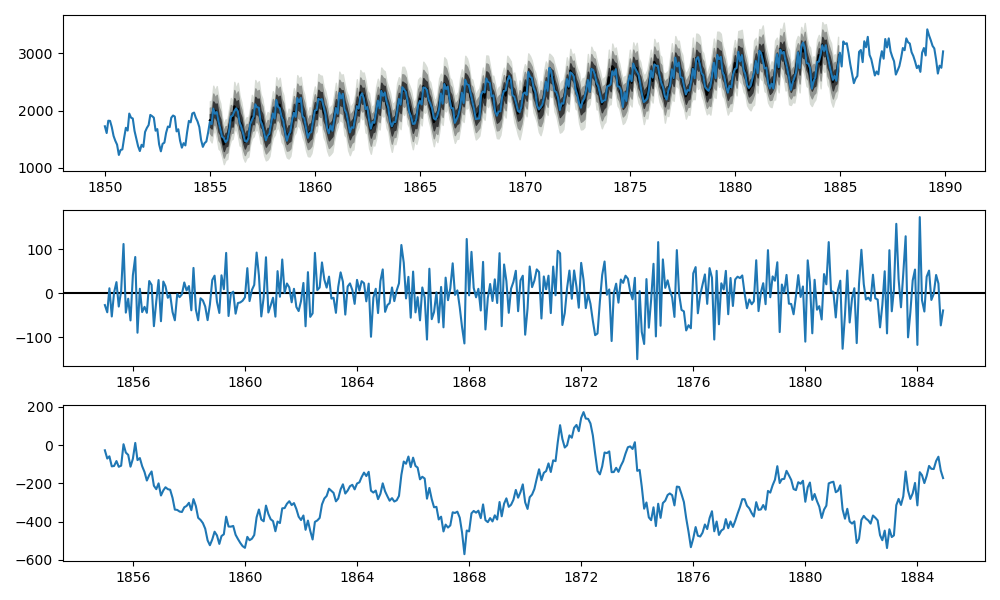

In [ ]:
# curData = df['Base']
curData = emf.groupByMonth(df['Base4'])
curMean,curStd = emf.rnMean(curData)
# curMean2,curStd2 = emf.rnMean(curData)

%matplotlib widget
fig,(ax,ax2,ax3) = plt.subplots(3,1,figsize=(10,6))
ax.plot(curMean,color='k')
ax.fill_between(x=curMean.index,y1=curMean-3*curStd,y2=curMean+3*curStd,color='xkcd:light gray')
ax.fill_between(x=curMean.index,y1=curMean-2*curStd,y2=curMean+2*curStd,color='xkcd:gray')
ax.fill_between(x=curMean.index,y1=curMean-curStd,y2=curMean+curStd,color='xkcd:dark gray')
ax.plot(curData)
# ax.plot(curMean2)
ax2.axhline(0,color='k')
ax2.plot(curData-curMean)

ax3.plot((curData-curMean).cumsum())

fig.tight_layout()

# # curMean.melt(id_vars=['index'])
# curMean = curMean.reset_index().melt(id_vars='Year')
# curMean['Date'] = pd.to_datetime(dict(year=curMean.Year,month=curMean.Month,day=np.ones(len(curMean.Year))))

# curMean.sort_values('Date').set_index('Date').drop(columns=['Year','Month']).rename(columns={'value':'Baseline'})

In [ ]:
pdSeries = df.Base 
numYears = 5 

# Start by grouping data by month, in case its daily
serMonth = pdSeries.groupby([pdSeries.index.year.rename('Year'),pdSeries.index.month.rename('Month')]).sum()

# Organize as pivot table
curPivot = serMonth.to_frame().pivot_table('Base',index='Year',columns='Month')

# Calculate sum of surrounding years and current year
curSum = curPivot.rolling(window=(numYears*2)+1,center=True).sum()
# Calculate mean of surrounding years by subtracting the current year and dividing by the number of surrounding years
curMean = (curSum - curPivot)/(numYears*2)

# Calculate the sum of squares of surrounding years and current year
curSumSqr = curPivot.pow(2).rolling(window=(numYears*2)+1,center=True).sum()
curMeanSqr = (curSumSqr - curPivot.pow(2))/(numYears*2)

# Calculate emperical standard deviation 
curStd = (curMeanSqr - curMean.pow(2)).pow(0.5)

In [ ]:
# curMean.T.plot()


In [ ]:

# # dfMonth.loc[1850:1852]

# curSeries = df['Base']
# serMonth = curSeries.groupby([curSeries.index.year.rename('Year'),curSeries.index.month.rename('Month')]).sum()
# # serMonth.pivot_table('Base',index='Year',columns='Month')
# curPivot = serMonth.to_frame().pivot_table('Base',index='Year',columns='Month')

# numYears = 2
# (curPivot.rolling(window=(numYears*2)+1,center=True).sum() - curPivot)/(numYears*2)

# curMean,curStd = emf.rnMean(df['Base'])
# curStd
pdSeries = df['Base']
numYears = 5

# Start by grouping data by month, in case its daily
serMonth = pdSeries.groupby([pdSeries.index.year.rename('Year'),pdSeries.index.month.rename('Month')]).sum()

# Organize as pivot table
curPivot = serMonth.to_frame().pivot_table('Base',index='Year',columns='Month')

# Calculate sum of surrounding years and current year
curSum = curPivot.rolling(window=(numYears*2)+1,center=True).sum()
# Calculate mean of surrounding years by subtracting the current year and dividing by the number of surrounding years
curMean = (curSum - curPivot)/(numYears*2)

# Calculate the sum of squares of surrounding years and current year
curSumSqr = curPivot.pow(2).rolling(window=(numYears*2)+1,center=True).sum()
curMeanSqr = (curSumSqr - curPivot.pow(2))/(numYears*2)

# Calculate emperical standard deviation 
curStd = (curMeanSqr - curMean.pow(2)).pow(0.5)

# curBase = (curPivot.rolling(window=(2*numYears)+1,center=True).sum() - curPivot)/(2*numYears)
# curBase2 = (curPivot.pow(2).rolling(window=(numYears*2)+1,center=True).sum() - curPivot.pow(2))/(numYears*2)


# curBase2 - curBase.pow(2)
# # curBase2.loc[1860]
# # curMeanSqr.loc[1860]
# # curMeanSqr.pow(0.5)
# # curPivot.pow(2)
# # curSumSqr
# # curBase 
# # curBase2
curStd

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1855,47.278325,37.757781,22.697136,23.724460,42.174518,27.209557,35.905571,21.111371,23.752895,25.277658,35.997361,22.668039
1856,45.948232,40.830013,24.220033,27.171492,39.843318,23.148434,36.030681,35.445874,22.351957,26.485656,32.109812,20.730654
1857,42.677980,41.759310,42.270084,26.783577,45.771170,24.713559,38.003158,35.520276,35.970683,27.202206,32.328934,25.377155
1858,40.187685,29.336155,42.650791,26.858146,45.122500,22.291030,34.767945,36.733636,33.440096,30.434191,30.391611,26.452977


In [ ]:

# dfMonth.loc[1850:1860]
# dfMonth.xs(12,level=1).pivot_table('Base')
# dfMonth.pivot('Base')
# dfMonth.unstack()

curPivot = dfMonth.pivot_table('Base',index='Year',columns='Month')
# dfMonth.pivot_table('Base',index='Month',columns='Year')


curPivot = curPivot.iloc[:11,:]

# curPivot.rolling(window=numYears)

In [ ]:

numYears = 2
(curPivot.rolling(window=(numYears*2)+1,center=True).sum() - curPivot)/(numYears*2)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1852,1565.00,1397.50,1544.50,1482.75,1552.75,1487.25,1551.50,1514.75,1503.75,1531.25,1519.75,1550.50
1853,1539.25,1394.25,1549.25,1498.25,1559.00,1501.25,1524.25,1535.00,1486.25,1554.75,1501.75,1550.00
1854,1567.75,1407.75,1547.00,1497.00,1565.50,1497.00,1546.25,1550.50,1497.50,1563.25,1508.00,1559.50
1855,1582.50,1399.75,1547.25,1482.25,1572.00,1481.25,1549.50,1522.25,1509.25,1556.50,1517.75,1547.75
1856,1561.75,1408.75,1536.50,1500.00,1553.75,1492.75,1543.75,1548.25,1510.75,1565.75,1498.50,1551.00
1857,1569.75,1411.00,1530.75,1503.25,1565.25,1504.25,1550.75,1565.50,1517.00,1568.00,1518.50,1557.25
1858,1570.50,1406.50,1538.75,1505.25,1570.75,1503.75,1547.25,1535.50,1501.25,1572.25,1508.75,1533.75
